##Hello, We are Penguins! And we have types too.

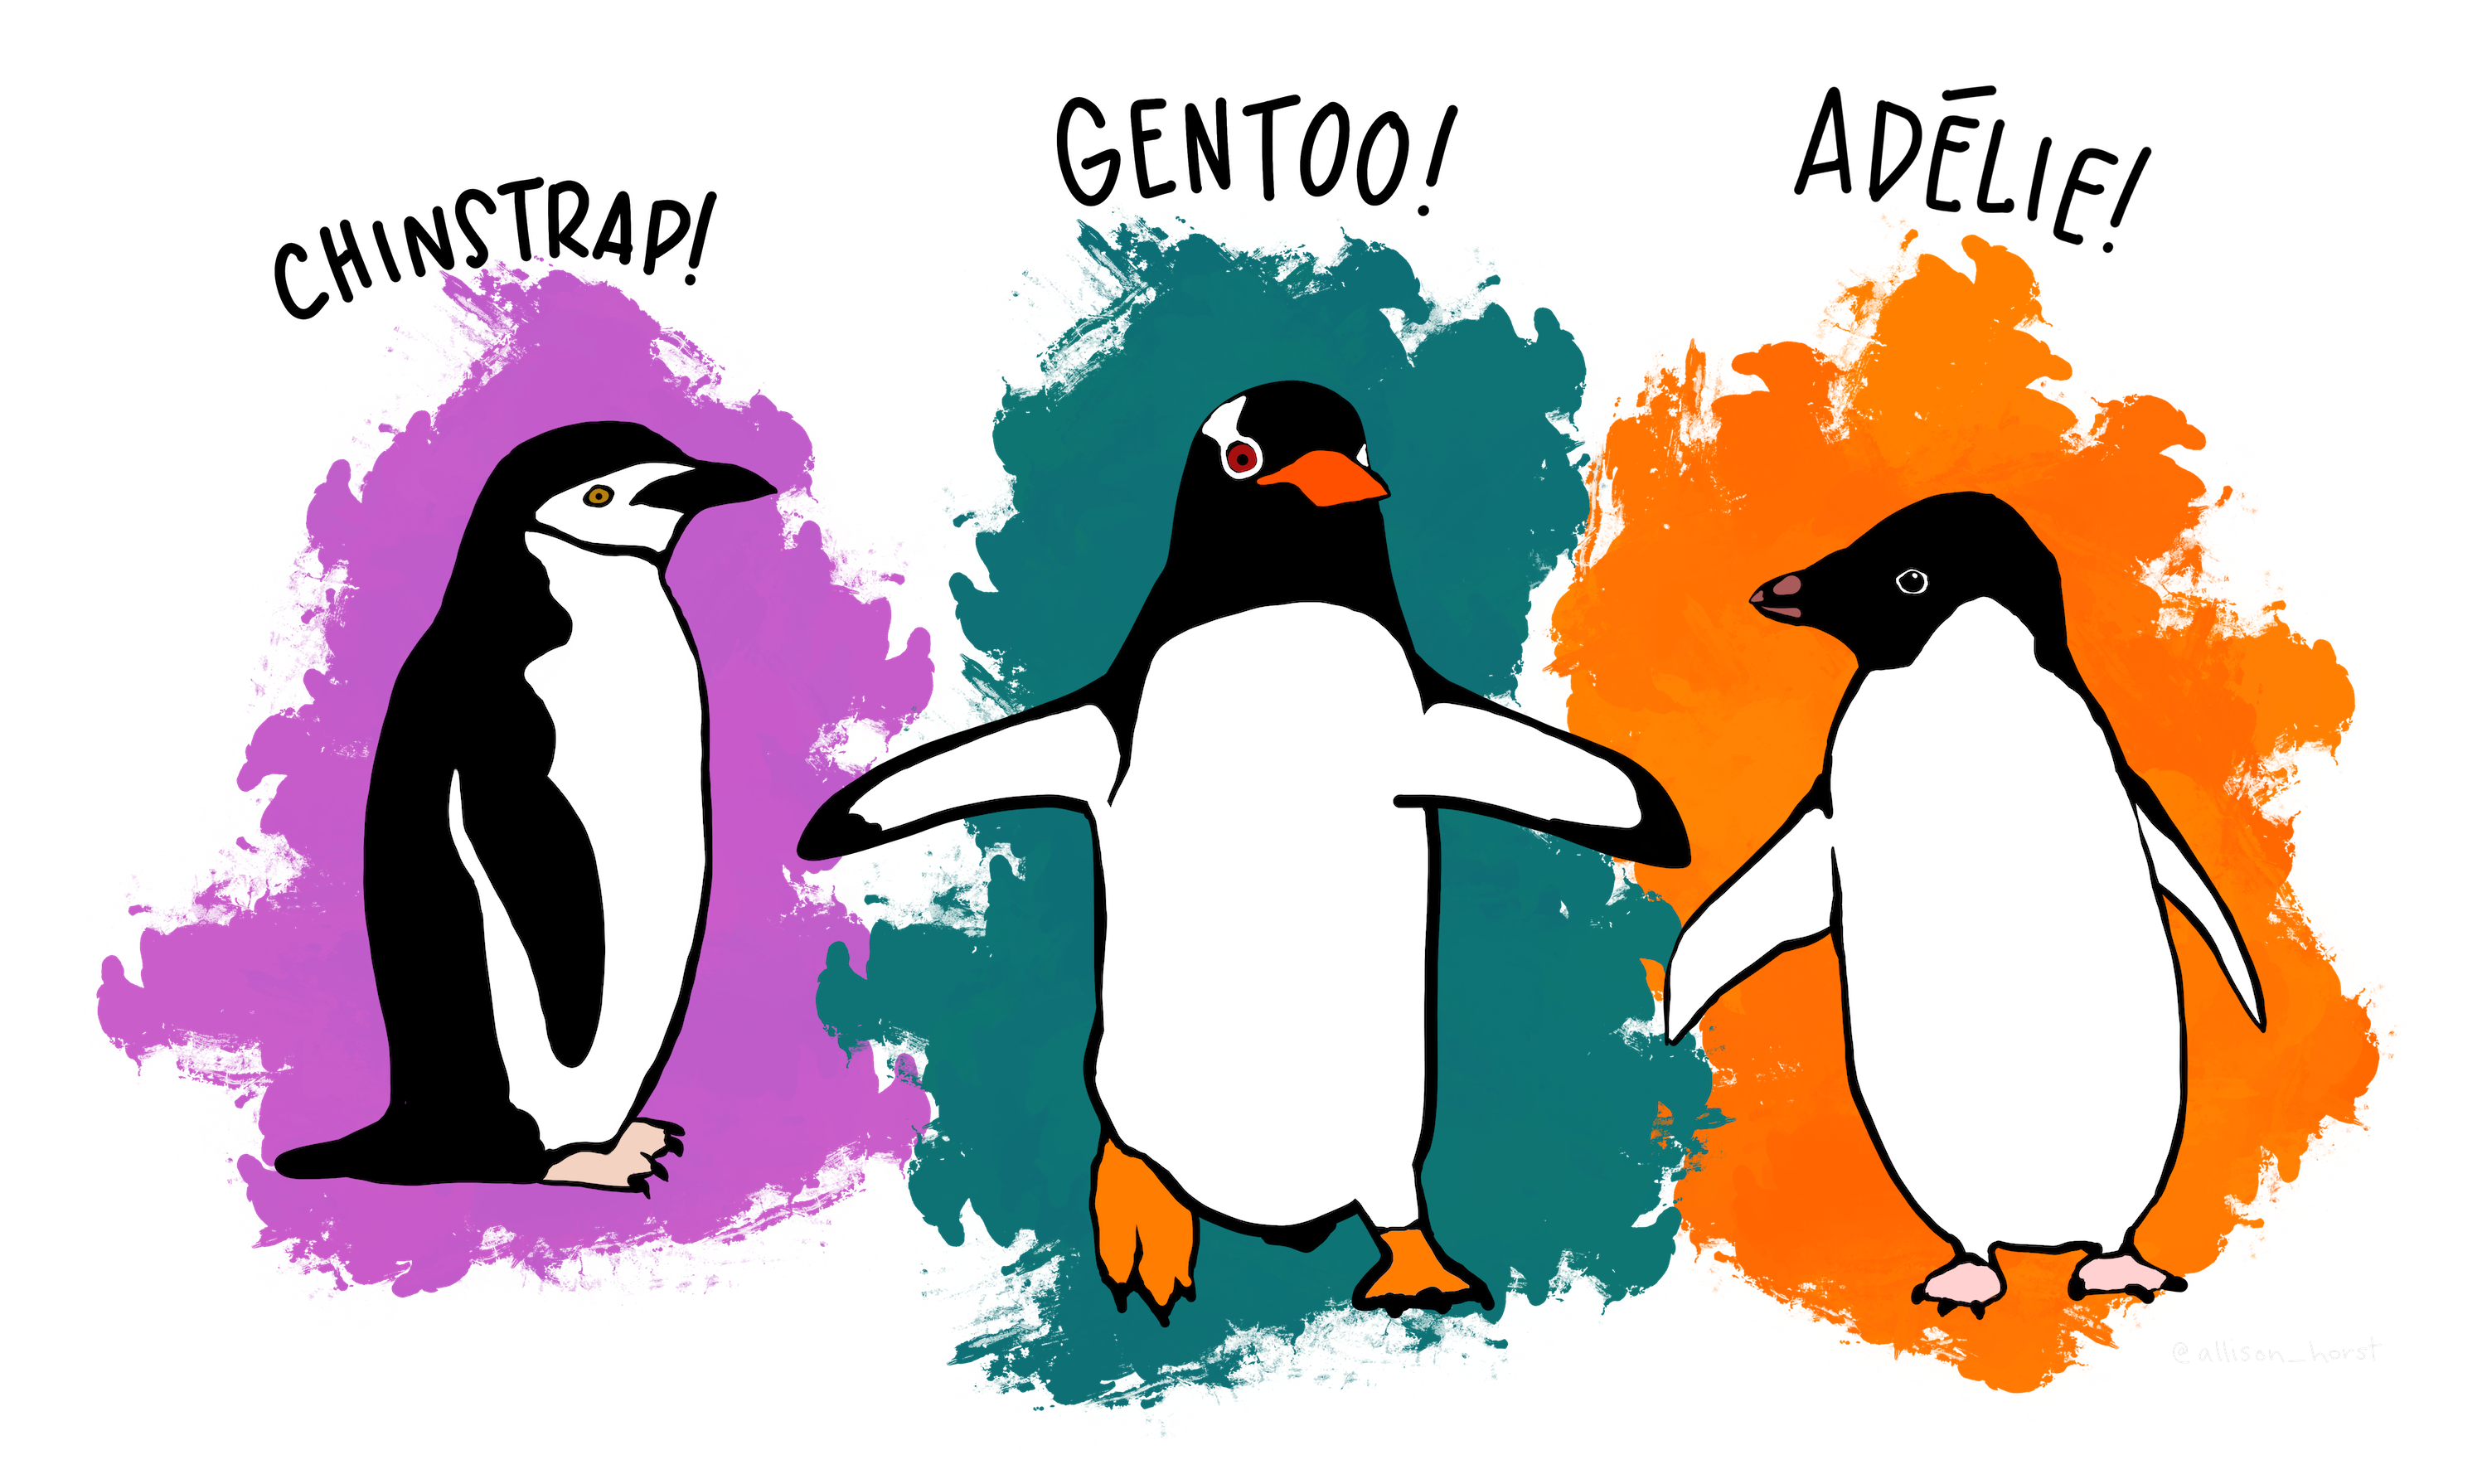

Artwork by @**allison_horst”**

#1) Data Loading and Preprocessing

Lets get to know us more through the penguin dataset!
Reading the dataset

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
file_path = '/content/penguins_size.csv'
data = pd.read_csv(file_path, sep=',')
data.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

Understanding the data

In [13]:
data.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

In [14]:
data.shape

(344, 7)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#I see some missing values. Lets explore them and get rid of them

In [16]:
missing_df = data.isnull().sum().to_frame('Missing values in numbers')
missing_df['Missing values in %'] = round(missing_df['Missing values in numbers']*100/len(data),2)
missing_df

Missing values in numbers  Missing values in %
species                                    0                 0.00
island                                     0                 0.00
culmen_length_mm                           2                 0.58
culmen_depth_mm                            2                 0.58
flipper_length_mm                          2                 0.58
body_mass_g                                2                 0.58
sex                                       10                 2.91

In [17]:
data.dropna(inplace=True)

In [18]:
print("Is there any Missing Values:",data.isnull().sum().any())

Is there any Missing Values: False


In [19]:
data.describe(include="object")

species  island   sex
count      334     334   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       146     164   168

#Why does sex have 3 unique count? Lets investigate.

In [20]:
data['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Got you period, you cant hide from me.

In [21]:
data.drop(data[data['sex'] == '.'].index, inplace = True)

In [22]:
data['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

We are all set! Lets deep dive into the data!

#2) Data Processing and Visualization


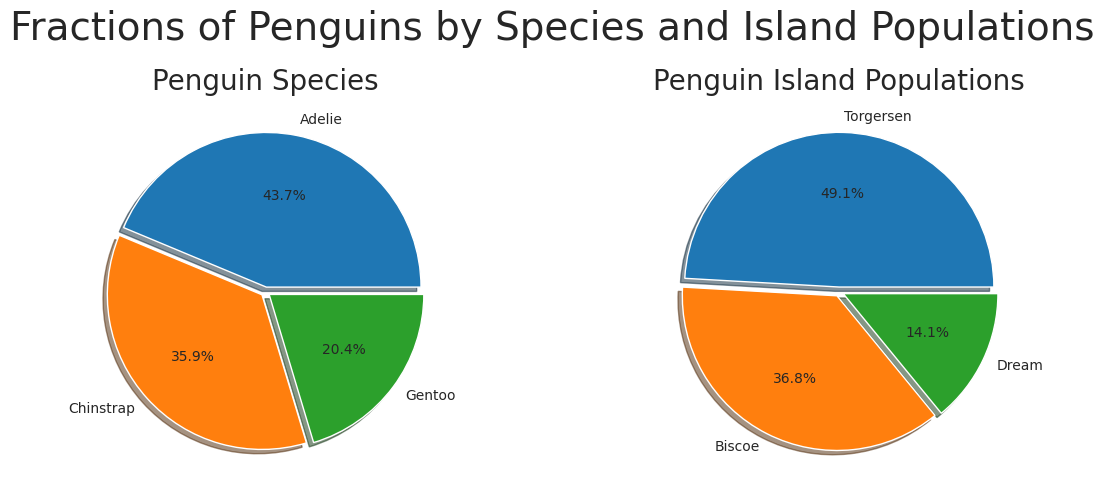

In [64]:
val1 = data.species.value_counts()
val2 = data.island.value_counts()

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.pie(val1,labels=['Adelie','Chinstrap','Gentoo'],autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03))
ax1.set_title('Penguin Species',fontsize=20);
ax2.pie(val2,labels=['Torgersen','Biscoe','Dream'],autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03))
ax2.set_title('Penguin Island Populations',fontsize=20);

fig.suptitle("Fractions of Penguins by Species and Island Populations",fontsize=28)
plt.tight_layout()

Percentage Representation: Out of the total penguin population sampled or recorded in your dataset, 15.1% are located on Dream Island. This is a relative measure, comparing the number of penguins on Dream Island to the total number across all islands in the dataset.
Comparative Analysis:
Dream Island hosts fewer penguins compared to Torgersen (48.8%) and Biscoe (36.0%). This could be due to various ecological, environmental, or geographical factors that make Dream Island either less attractive or less accessible for penguins compared to the other islands.
The distribution can provide insights into habitat preferences among penguins and how these might correlate with available resources, breeding sites, or predator presence on each island.

In [66]:
import plotly.express as px

col = "Distribution of Penguins by Species and Sex"

fig2 = px.sunburst(data, path=["species", "sex"])
fig2.update_traces(textinfo="label + percent parent")
fig2.update_layout(title_text=col,
  titlefont={"size": 20, "family": "Serif"},
  width=500, height=500)
fig2.show()

3 species - Adelie, Chinstrap and Gentoo

3 islands - Torgersen, Biscoe and Dream

Looks like Torgersen only has Adelie species. The whole island for Adelie's! Instresting.

<Figure size 1000x700 with 0 Axes>

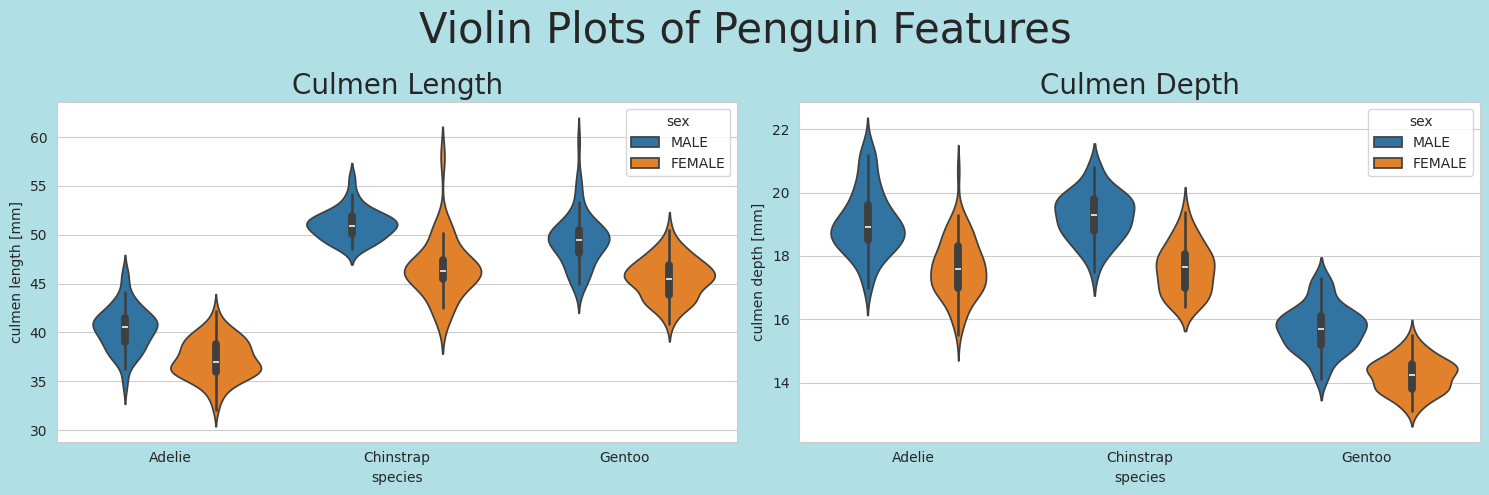

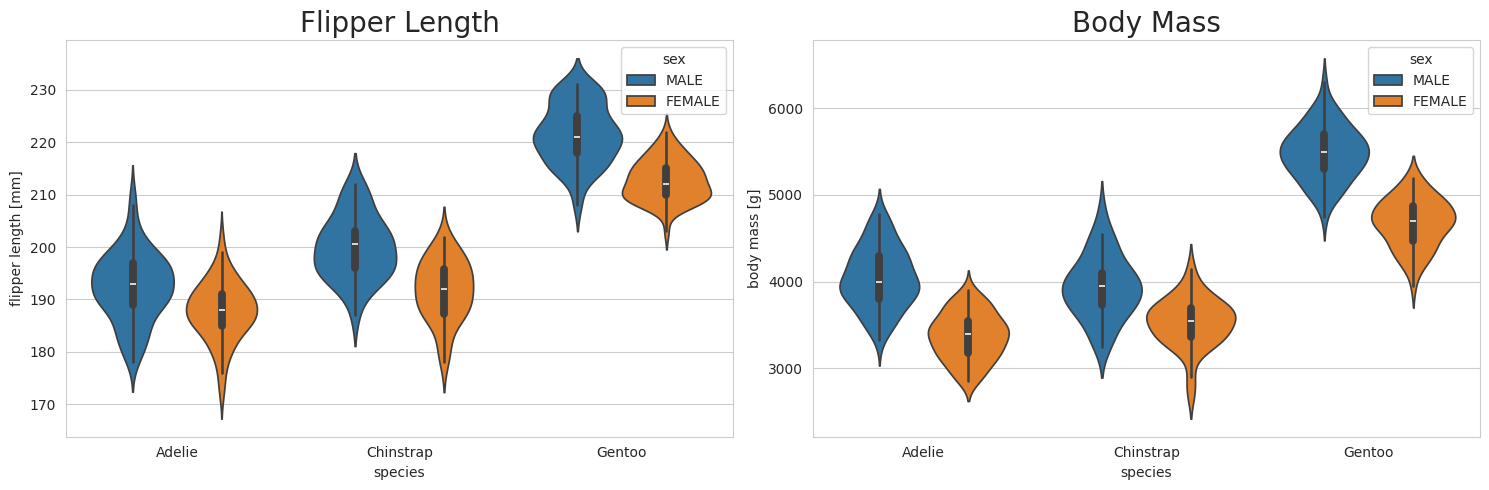

In [63]:
fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,5));

axes[0] = sns.violinplot(x='species',y='culmen_length_mm',hue='sex',data=data[data['sex'] != '.'],ax=axes[0])
axes[0].set_title('Culmen Length',fontsize=20);
axes[0].set_ylabel('culmen length [mm]')

axes[1] = sns.violinplot(x='species',y='culmen_depth_mm',hue='sex',data=data[data['sex'] != '.'],ax=axes[1])
axes[1].set_title('Culmen Depth',fontsize=20);
axes[1].set_ylabel('culmen depth [mm]')

fig.suptitle("Violin Plots of Penguin Features",fontsize=30)
fig.set_facecolor('powderblue')
plt.tight_layout()


bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,5));

axes[0] = sns.violinplot(x='species',y='flipper_length_mm',hue='sex',data=data[data['sex'] != '.'],ax=axes[0])
axes[0].set_title('Flipper Length',fontsize=20);
axes[0].set_ylabel('flipper length [mm]')

axes[1] = sns.violinplot(x='species',y='body_mass_g',hue='sex',data=data[data['sex'] != '.'],ax=axes[1])
axes[1].set_title('Body Mass',fontsize=20)
axes[1].set_ylabel('body mass [g]')

plt.tight_layout()

plt.tight_layout()
plt.show()

#Gentoo is arguing that he has higher body mass and flipper length than other! Lets find out if he is saying the truth!

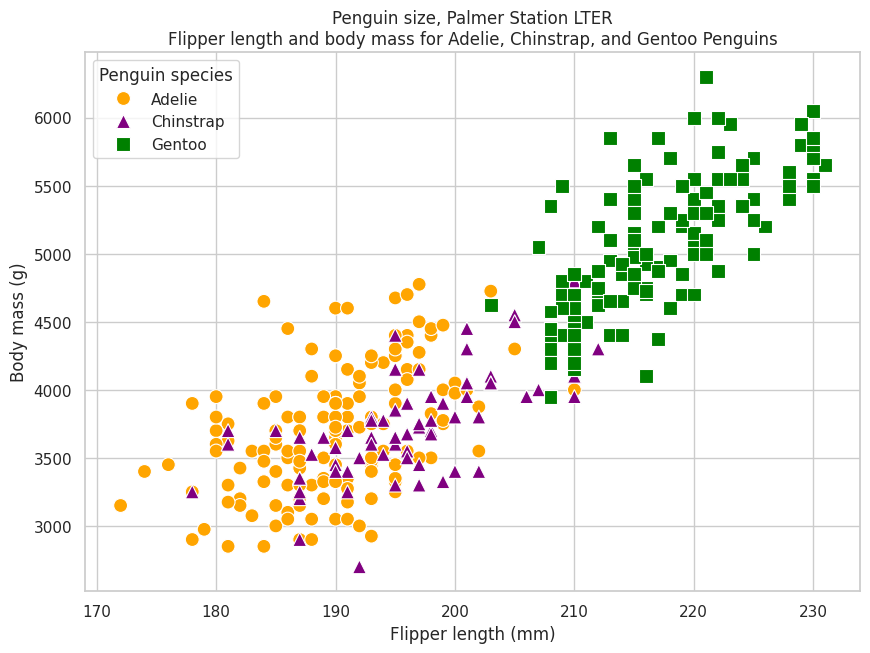

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species', style='species',
                palette={'Adelie': 'orange', 'Chinstrap': 'purple', 'Gentoo': 'green'},
                markers={'Adelie': 'o', 'Chinstrap': '^', 'Gentoo': 's'},
                s=100)

plt.title('Penguin size, Palmer Station LTER\nFlipper length and body mass for Adelie, Chinstrap, and Gentoo Penguins')
plt.xlabel('Flipper length (mm)')
plt.ylabel('Body mass (g)')
plt.grid(True)
plt.legend(title='Penguin species')
plt.show()

# He indeed is! We can see that Gentoo's (green squares) stand out with significantly longer flippers and higher body mass, mainly falling between 210 and 230 mm for flipper length and 4500 to 6000 grams in body mass.

Gentoos, with their larger body mass and longer flippers, may be adapted to colder environments and longer swimming durations, which is consistent with their distribution in colder Antarctic regions.

Adelie and Chinstrap penguins, with shorter flippers, might be adapted for agility over shorter distances, reflecting different feeding and migratory behaviors.

There is a visible positive correlation for all species, indicating that penguins with longer flippers tend to have a higher body mass

# One thing to note here is that there is strong superposition between the Flipper Length and Body Mass of Adelie and Chinstrap penguins I wonder if this is tru with the other features as well. Lets check!

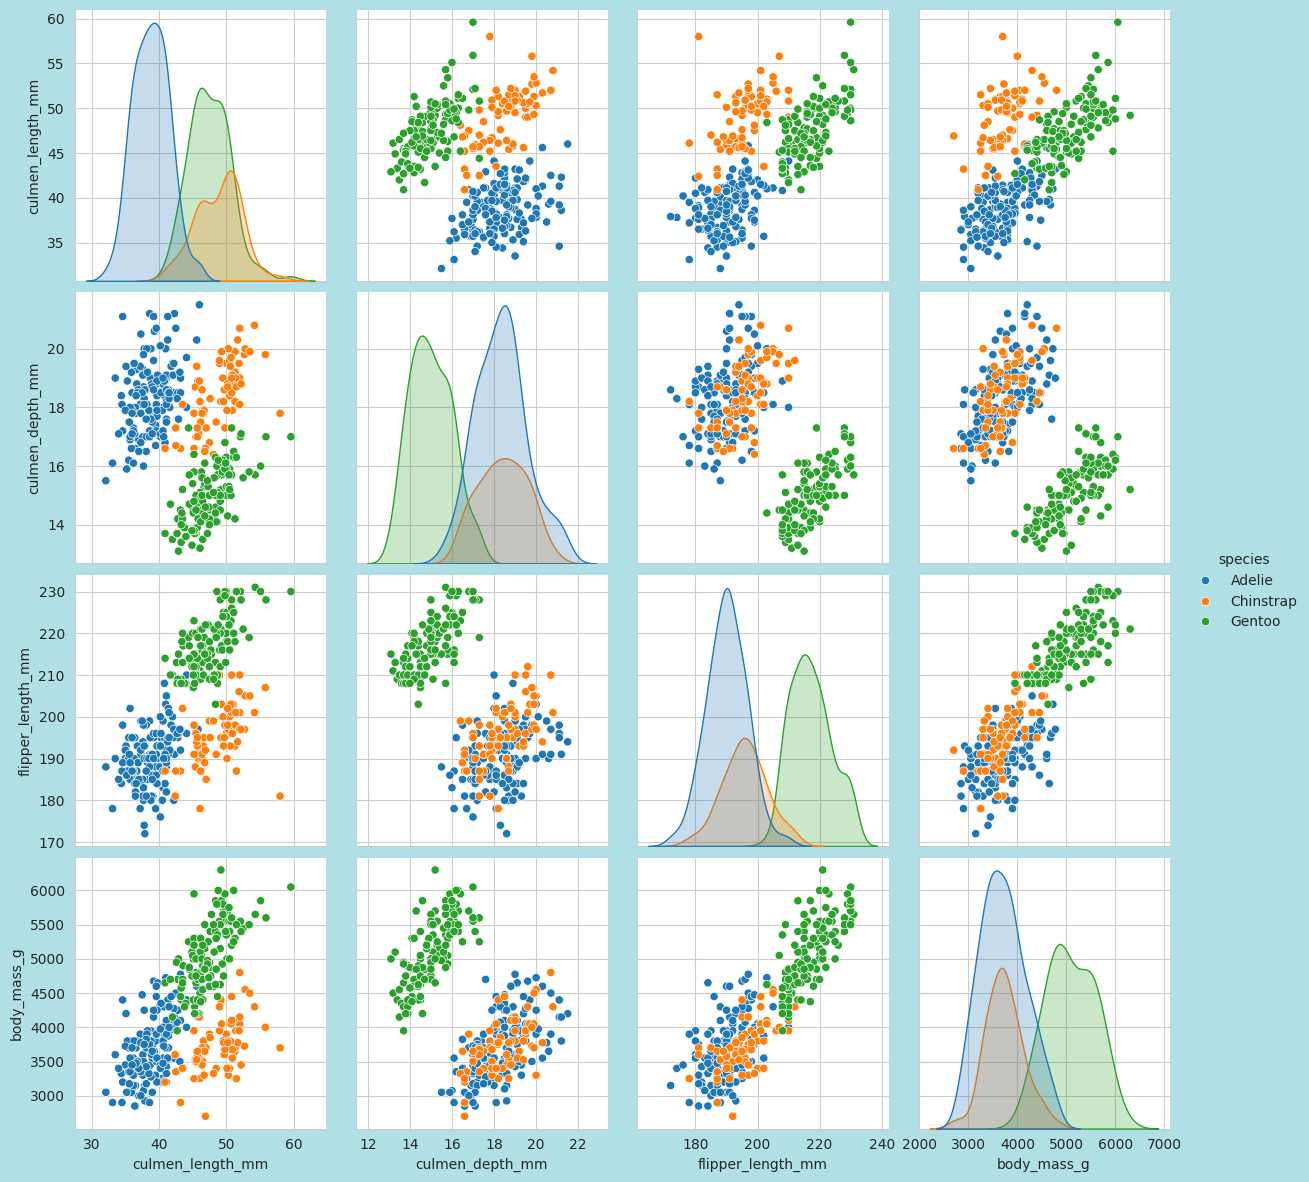

In [33]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="species",height=3);

plt.gcf().patch.set_facecolor('powderblue')
plt.show()

The diagonal cells (red) always show a correlation of 1.00 because any variable is perfectly correlated with itself.
The correlation values are mirrored across the diagonal because the relationship is bidirectional (flipper length to body mass is the same as body mass to flipper length).
Higher correlation values (closer to 1) in Gentoos suggest that their size traits (like flipper length and body mass) are more closely linked, perhaps due to stronger selective pressures or less environmental variation in their habitats compared to the other two species.
The correlation differences across species might reflect different ecological strategies, growth patterns, or evolutionary histories.

These insights can help biologists and ecologists understand how different physical traits are interrelated within each species and can inform studies on the ecological roles and adaptive strategies of these penguins in their respective environments.

#Well, now lets explore the correlation between body mass and culmen kength

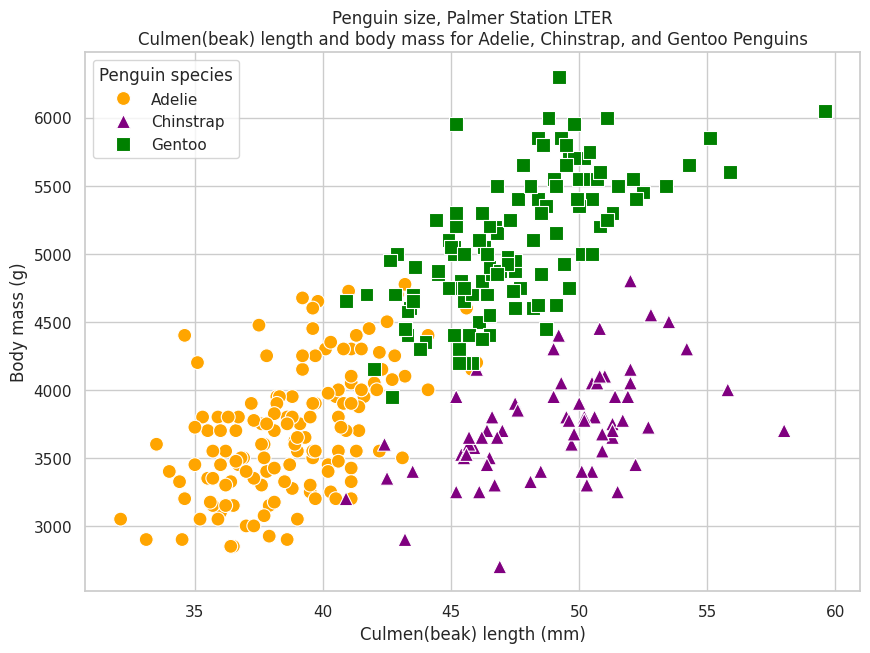

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x='culmen_length_mm', y='body_mass_g', hue='species', style='species',
                palette={'Adelie': 'orange', 'Chinstrap': 'purple', 'Gentoo': 'green'},
                markers={'Adelie': 'o', 'Chinstrap': '^', 'Gentoo': 's'},
                s=100)

plt.title('Penguin size, Palmer Station LTER\nCulmen(beak) length and body mass for Adelie, Chinstrap, and Gentoo Penguins')
plt.xlabel('Culmen(beak) length (mm)')
plt.ylabel('Body mass (g)')
plt.grid(True)
plt.legend(title='Penguin species')
plt.show()

There appears to be a general trend where penguins with longer culmens tend to have a higher body mass across species, particularly noticeable in Gentoo penguins. This might indicate an evolutionary advantage or a dietary requirement that supports larger body sizes with larger beaks.

Adelie Penguins (orange circles) have shorter culmen lengths, mostly ranging from 35 to 45 mm, and their body mass typically ranges from 3000 to 4500 grams. The distribution suggests a moderate correlation between culmen length and body mass within this species.

Chinstrap Penguins (purple triangles) show a more clustered distribution, mostly with culmen lengths around 45 to 50 mm and body masses around 3500 to 4000 grams, indicating a somewhat consistent size among this species with less variation compared to Adelie penguins.

Gentoo Penguins (green squares) are characterized by larger culmen lengths, generally between 45 and 60 mm, and higher body masses ranging from 4500 to 6000 grams. This species shows a clear positive correlation between culmen length and body mass, suggesting that larger beak sizes are associated with heavier body weights.

#3) Linear Regression and Validation

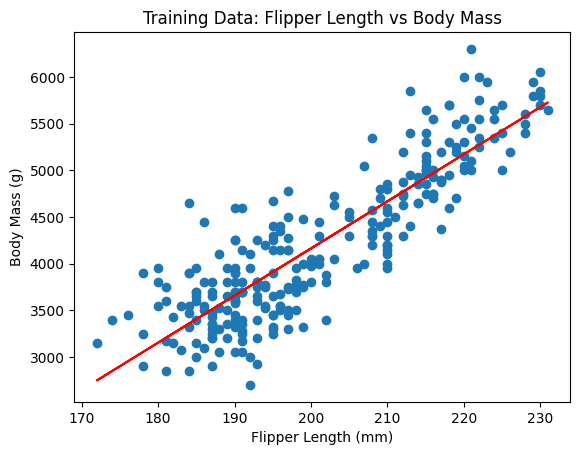

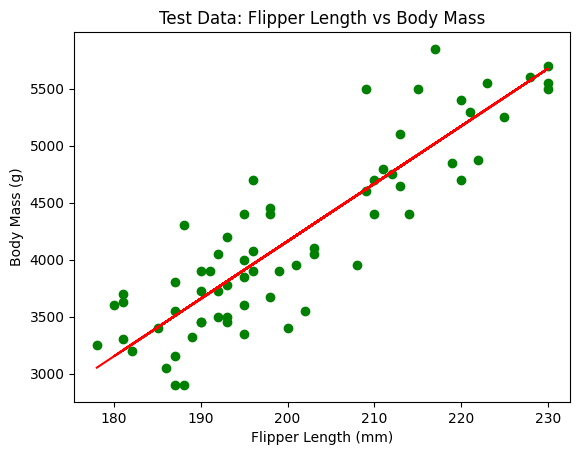

*****************************
Training Data R-squared: 76.04%
Test Data R-squared: 77.04%
Mean Absolute Error: 300.12 g
Root Mean Squared Error: 374.51 g
Coefficients: [50.46746483]
Intercept: -5931.563273314287
*****************************


In [26]:
from sklearn.model_selection import train_test_split

#Preparing the data
flipper_length = data["flipper_length_mm"].values.reshape(-1, 1)
body_mass = data["body_mass_g"].values

#Splitting data into training and test sets
flipper_length_train, flipper_length_test, body_mass_train, body_mass_test = train_test_split(
  flipper_length, body_mass, test_size=0.2, random_state=42)

#Model training
model = LinearRegression()
model.fit(flipper_length_train, body_mass_train)

#Prediction
body_mass_predict_train = model.predict(flipper_length_train)
body_mass_predict_test = model.predict(flipper_length_test)

#Plot training data
plt.scatter(flipper_length_train, body_mass_train)
plt.plot(flipper_length_train, body_mass_predict_train, color="red")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Training Data: Flipper Length vs Body Mass")
plt.show()

#Plot test data
plt.scatter(flipper_length_test, body_mass_test, color="green")
plt.plot(flipper_length_test, body_mass_predict_test, color="red")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Test Data: Flipper Length vs Body Mass")
plt.show()

#Metrics calculation
r_squared_train = round(model.score(flipper_length_train, body_mass_train) * 100, 2)
r_squared_test = round(model.score(flipper_length_test, body_mass_test) * 100, 2)
mae = round(mean_absolute_error(body_mass_test, body_mass_predict_test), 2)
rmse = round(np.sqrt(mean_squared_error(body_mass_test, body_mass_predict_test)), 2)
coefficients = model.coef_
intercept = model.intercept_

#Output results
print("*****************************")
print(f"Training Data R-squared: {r_squared_train}%")
print(f"Test Data R-squared: {r_squared_test}%")
print(f"Mean Absolute Error: {mae} g")
print(f"Root Mean Squared Error: {rmse} g")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print("*****************************")

While there is some variation in the spread of body masses compared to the lenghth of the flipper on a penguin, there is a relatively strong correlation
Using this measurement to estimate the mass of a penguin would be within a reasonable margin of error on most estimates

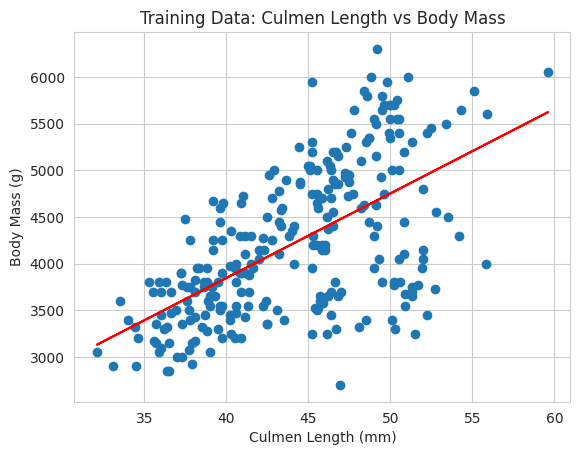

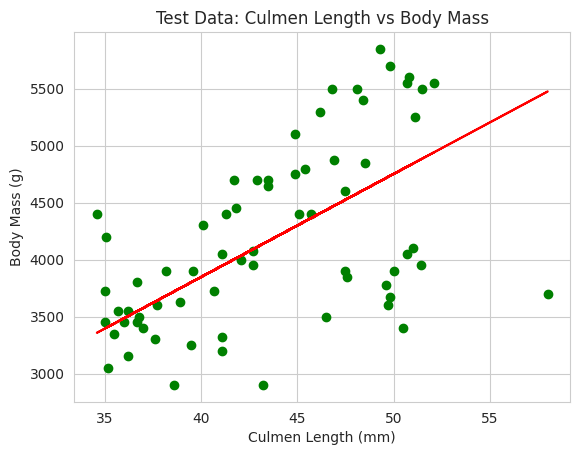

*****************************
Training Data R-squared: 36.27%
Test Data R-squared: 27.46%
Mean Absolute Error: 537.01 g
Root Mean Squared Error: 665.64 g
Coefficients: [90.56941831]
Intercept: 223.62200165002514
*****************************


In [34]:
#Preparing the data
culmen_length = data["culmen_length_mm"].values.reshape(-1, 1)
body_mass = data["body_mass_g"].values

#Splitting data into training and test sets
culmen_length_train, culmen_length_test, body_mass_train, body_mass_test = train_test_split(
  culmen_length, body_mass, test_size=0.2, random_state=42)

#Model training
culmen_model = LinearRegression()
culmen_model.fit(culmen_length_train, body_mass_train)

#Prediction
body_mass_predict_train = culmen_model.predict(culmen_length_train)
body_mass_predict_test = culmen_model.predict(culmen_length_test)

#Plot training data
plt.scatter(culmen_length_train, body_mass_train)
plt.plot(culmen_length_train, body_mass_predict_train, color="red")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Training Data: Culmen Length vs Body Mass")
plt.show()

#Plot test data
plt.scatter(culmen_length_test, body_mass_test, color="green")
plt.plot(culmen_length_test, body_mass_predict_test, color="red")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Test Data: Culmen Length vs Body Mass")
plt.show()

#Metrics calculation
r_squared_train = round(culmen_model.score(culmen_length_train, body_mass_train) * 100, 2)
r_squared_test = round(culmen_model.score(culmen_length_test, body_mass_test) * 100, 2)
mae = round(mean_absolute_error(body_mass_test, body_mass_predict_test), 2)
rmse = round(np.sqrt(mean_squared_error(body_mass_test, body_mass_predict_test)), 2)
coefficients = culmen_model.coef_
intercept = culmen_model.intercept_

#Output results
print("*****************************")
print(f"Training Data R-squared: {r_squared_train}%")
print(f"Test Data R-squared: {r_squared_test}%")
print(f"Mean Absolute Error: {mae} g")
print(f"Root Mean Squared Error: {rmse} g")
print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print("*****************************")

There is a wide spread of body masses compared to the lenghth of the culmen on a penguin
Using this measurement to estimate the mass of a penguin would be significantly innacurate on most estimates